In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn


In [2]:
import keras

Using CNTK backend
e:\Anaconda3\envs\cntk-py36\lib\site-packages\keras\backend\cntk_backend.py:19: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [3]:
from keras import layers, models

## COMP 3132 -  Machine Learning with Python
__Week 10 lecture__

### [github.com/kamrik/ML2](https://github.com/kamrik/ML2)

### [slido.com/COMP3132](http://slido.com/COMP3132)


## Plan for today
 - Home assignment questions, deadline is tomorrow.
 - Using a pretrained convnet
 - Visualizing what convnets learn
 

## Home assignment questions?
 - Due March 13
 - Start with the Yelp lab from previous term and newswires example from the book.
 

## ConvNets - recap
 - So far we used Dense layers
 - But for a picture of decent size like 1 MegaPixel that's too many connections
 - In ConvNets a unit is not connected to all units in the next layer

![ConvNet](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

## MaxPooling
![maxpooling](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

## The whole model for MNIST

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Visualizing neural nets

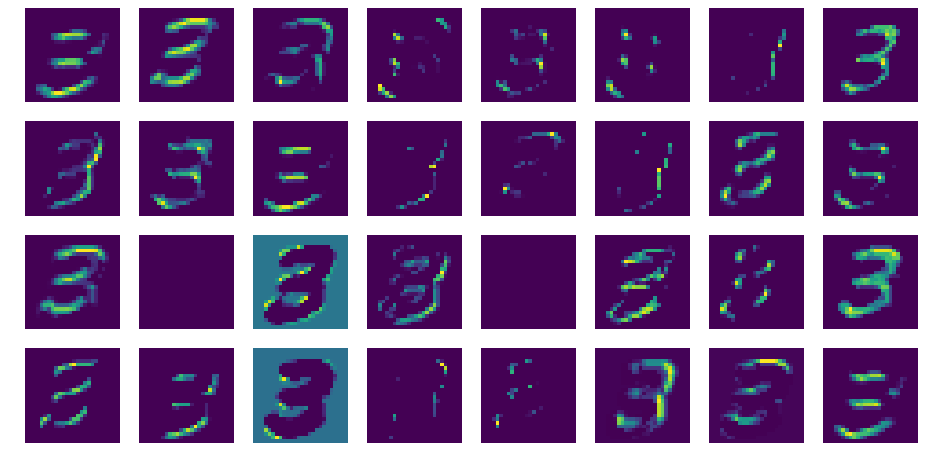

In [125]:
partial_model = models.Model(inputs=model.input, outputs=model.layers[0].output)
activations = partial_model.predict(train_images[:10])
plt.figure(figsize=(16,8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    act = activations[7][:,:,i]
    act[np.isnan(act)] = 0
    plt.imshow(act, cmap='viridis')
    plt.axis('off')
    plt.grid(False)


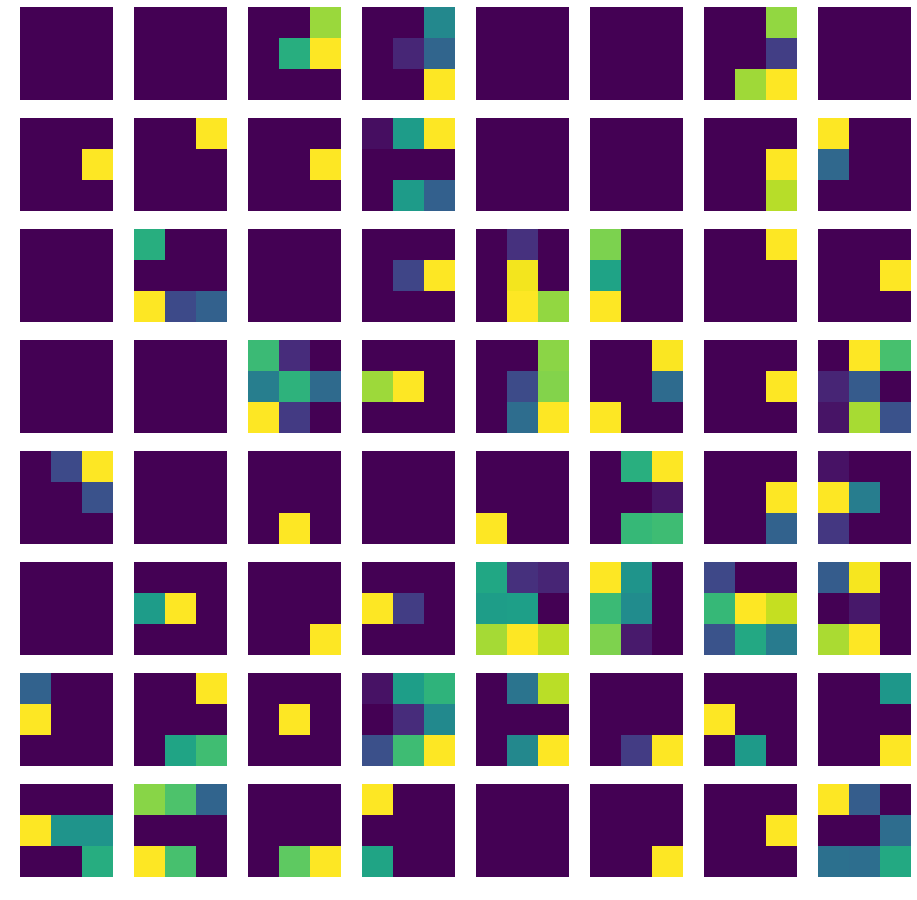

In [128]:
partial_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = partial_model.predict(train_images[:10])
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8, 8, i+1)
    act = activations[7][:,:,i]
    act[np.isnan(act)] = 0
    plt.imshow(act, cmap='viridis')
    plt.axis('off')
    plt.grid(False)

## Other visualizations - section 5.4
 - What part of the image made the network think it's an elephant
![elephant CAM](elephant_cam.jpg)

## What input image would maximize activation of a particular intermeidate unit
![patterns](max_patterns.png)

In [ ]:
model.save('mnist_digits.h5')